# Data Visualization and EDA

In [6]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import matplotlib.ticker as tick

color = sns.color_palette()


In [7]:
#This is a function by Dan Friedman to change the labels of large numbers 
#Here is a link
#https://dfrieds.com/data-visualizations/how-format-large-tick-values.html
sns.set(font_scale=1.4)

def reformat_large_tick_values(tick_val, pos):
    """
    Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).
    """
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

In [8]:
df = pd.read_csv('ny_data.csv')

In [9]:
df

,City,address/streetAddress,ZipCode,latitude,livingArea,longitude,price,priceChangeRate,propertyTaxRate,HomeType,...,school_1_rating,school_1_size,school_1_s/t_ratio,school_1_type,school_2_distance,school_2_level,school_2_rating,school_2_size,school_2_s/t_ratio,school_2_type
0,New York,60 Terrace View Ave,10463.0,40.877743,1889.0,-73.910866,799999.0,0.335558,0.88,Residential,...,4.0,647.0,14.0,Public,0.1,Middle,3.0,993.0,14.0,Public
1,Bronx,625 W 246th St,10471.0,40.892689,7000.0,-73.910667,3995000.0,-0.111235,0.95,Single Family,...,10.0,907.0,16.0,Public,0.3,Middle,5.0,1516.0,15.0,Public
2,Bronx,716 W 231st St,10463.0,40.883419,4233.0,-73.918106,1495000.0,-0.002668,0.95,Single Family,...,10.0,907.0,16.0,Public,0.4,Middle,5.0,1516.0,15.0,Public
3,Bronx,750 W 232nd St,10463.0,40.885033,7000.0,-73.917793,3450000.0,-0.092105,0.95,Single Family,...,10.0,907.0,16.0,Public,0.3,Middle,5.0,1516.0,15.0,Public
4,Bronx,632 W 230th St,10463.0,40.881702,NaN,-73.914185,1790000.0,0.000000,0.95,Single Family,...,10.0,907.0,16.0,Public,0.4,Middle,5.0,1516.0,15.0,Public
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62452,Flushing,6829 Manse St,11375.0,40.714203,2417.0,-73.855263,825000.0,-0.049539,0.84,Single Family,...,8.0,893.0,16.0,Public,0.6,Middle,7.0,1054.0,15.0,Public
62453,Forest Hills Gardens,82 Greenway Ter,11375.0,40.717163,6085.0,-73.843124,2704000.0,0.040400,0.84,Townhouse,...,9.0,654.0,16.0,Public,0.7,Middle,7.0,1054.0,15.0,Public
62454,Forest Hills Gardens,86 Greenway Ter,11375.0,40.717052,4564.0,-73.843025,2750000.0,-0.075630,0.84,Townhouse,...,9.0,654.0,16.0,Public,0.7,Middle,7.0,1054.0,15.0,Public
62455,Flushing,8913 70th Ave,11375.0,40.709549,1216.0,-73.854385,935000.0,0.558333,0.84,Single Family,...,8.0,893.0,16.0,Public,0.9,Middle,7.0,1054.0,15.0,Public


In [10]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

df.price.describe()

count      62457.000
mean      925039.922
std       918693.967
min       100000.000
25%       505000.000
50%       697000.000
75%       975000.000
max     10000000.000
Name: price, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


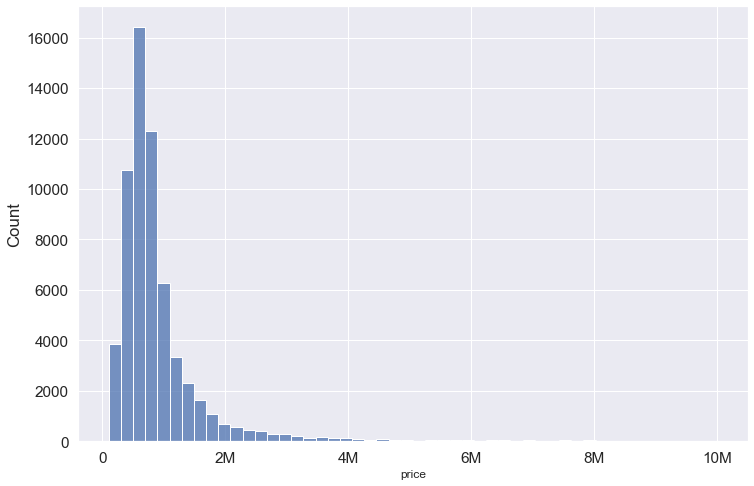

In [12]:
ulimit = np.percentile(df.price.values, 99)
llimit = np.percentile(df.price.values, 1)
df[df['price']>ulimit].price = ulimit
df[df['price']<llimit].price = llimit

fig, ax = plt.subplots(figsize=(12,8))
sns.histplot(df.price, bins=50, kde=False)
plt.xlabel('price', fontsize=12)
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
plt.show()

We can see the our price deviates from a normal distribution and it is peaked and most house prices are between 200k to 1.5mil and it is positively skewed and our kurtosis is really high implying we have very heavy tails

Skewness: 4.705448
Kurtosis: 30.075064


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


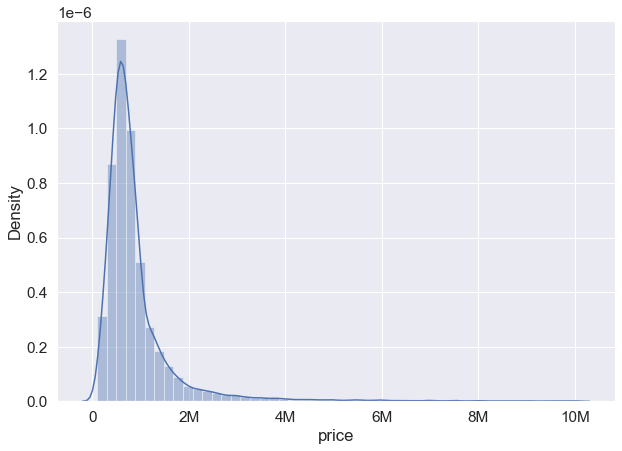

In [7]:
print("Skewness: %f" % df.price.skew())
print("Kurtosis: %f" % df.price.kurt())

fig, ax = plt.subplots(figsize=(10,7))
sns.distplot(df.price)
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
plt.show()

#Okay this is better as we removed a lot of wrong entries that were negatively impacting our dataset

In [8]:
df.price.describe()

count      62457.000
mean      925039.922
std       918693.967
min       100000.000
25%       505000.000
50%       697000.000
75%       975000.000
max     10000000.000
Name: price, dtype: float64

In [9]:
df.dtypes

City                      object
address/streetAddress     object
ZipCode                  float64
latitude                 float64
livingArea               float64
longitude                float64
price                    float64
priceChangeRate          float64
propertyTaxRate          float64
HomeType                  object
YearBuilt                float64
ParkingType               object
Full_Bathrooms           float64
Half_Bathrooms           float64
Bedrooms                 float64
Lot_Size                 float64
Story_Building           float64
Annual_Tax               float64
Tax_Assessed_Value       float64
school_1_distance        float64
school_1_grades           object
school_1_level            object
school_1_rating          float64
school_1_size            float64
school_1_s/t_ratio       float64
school_1_type             object
school_2_distance        float64
school_2_level            object
school_2_rating          float64
school_2_size            float64
school_2_s

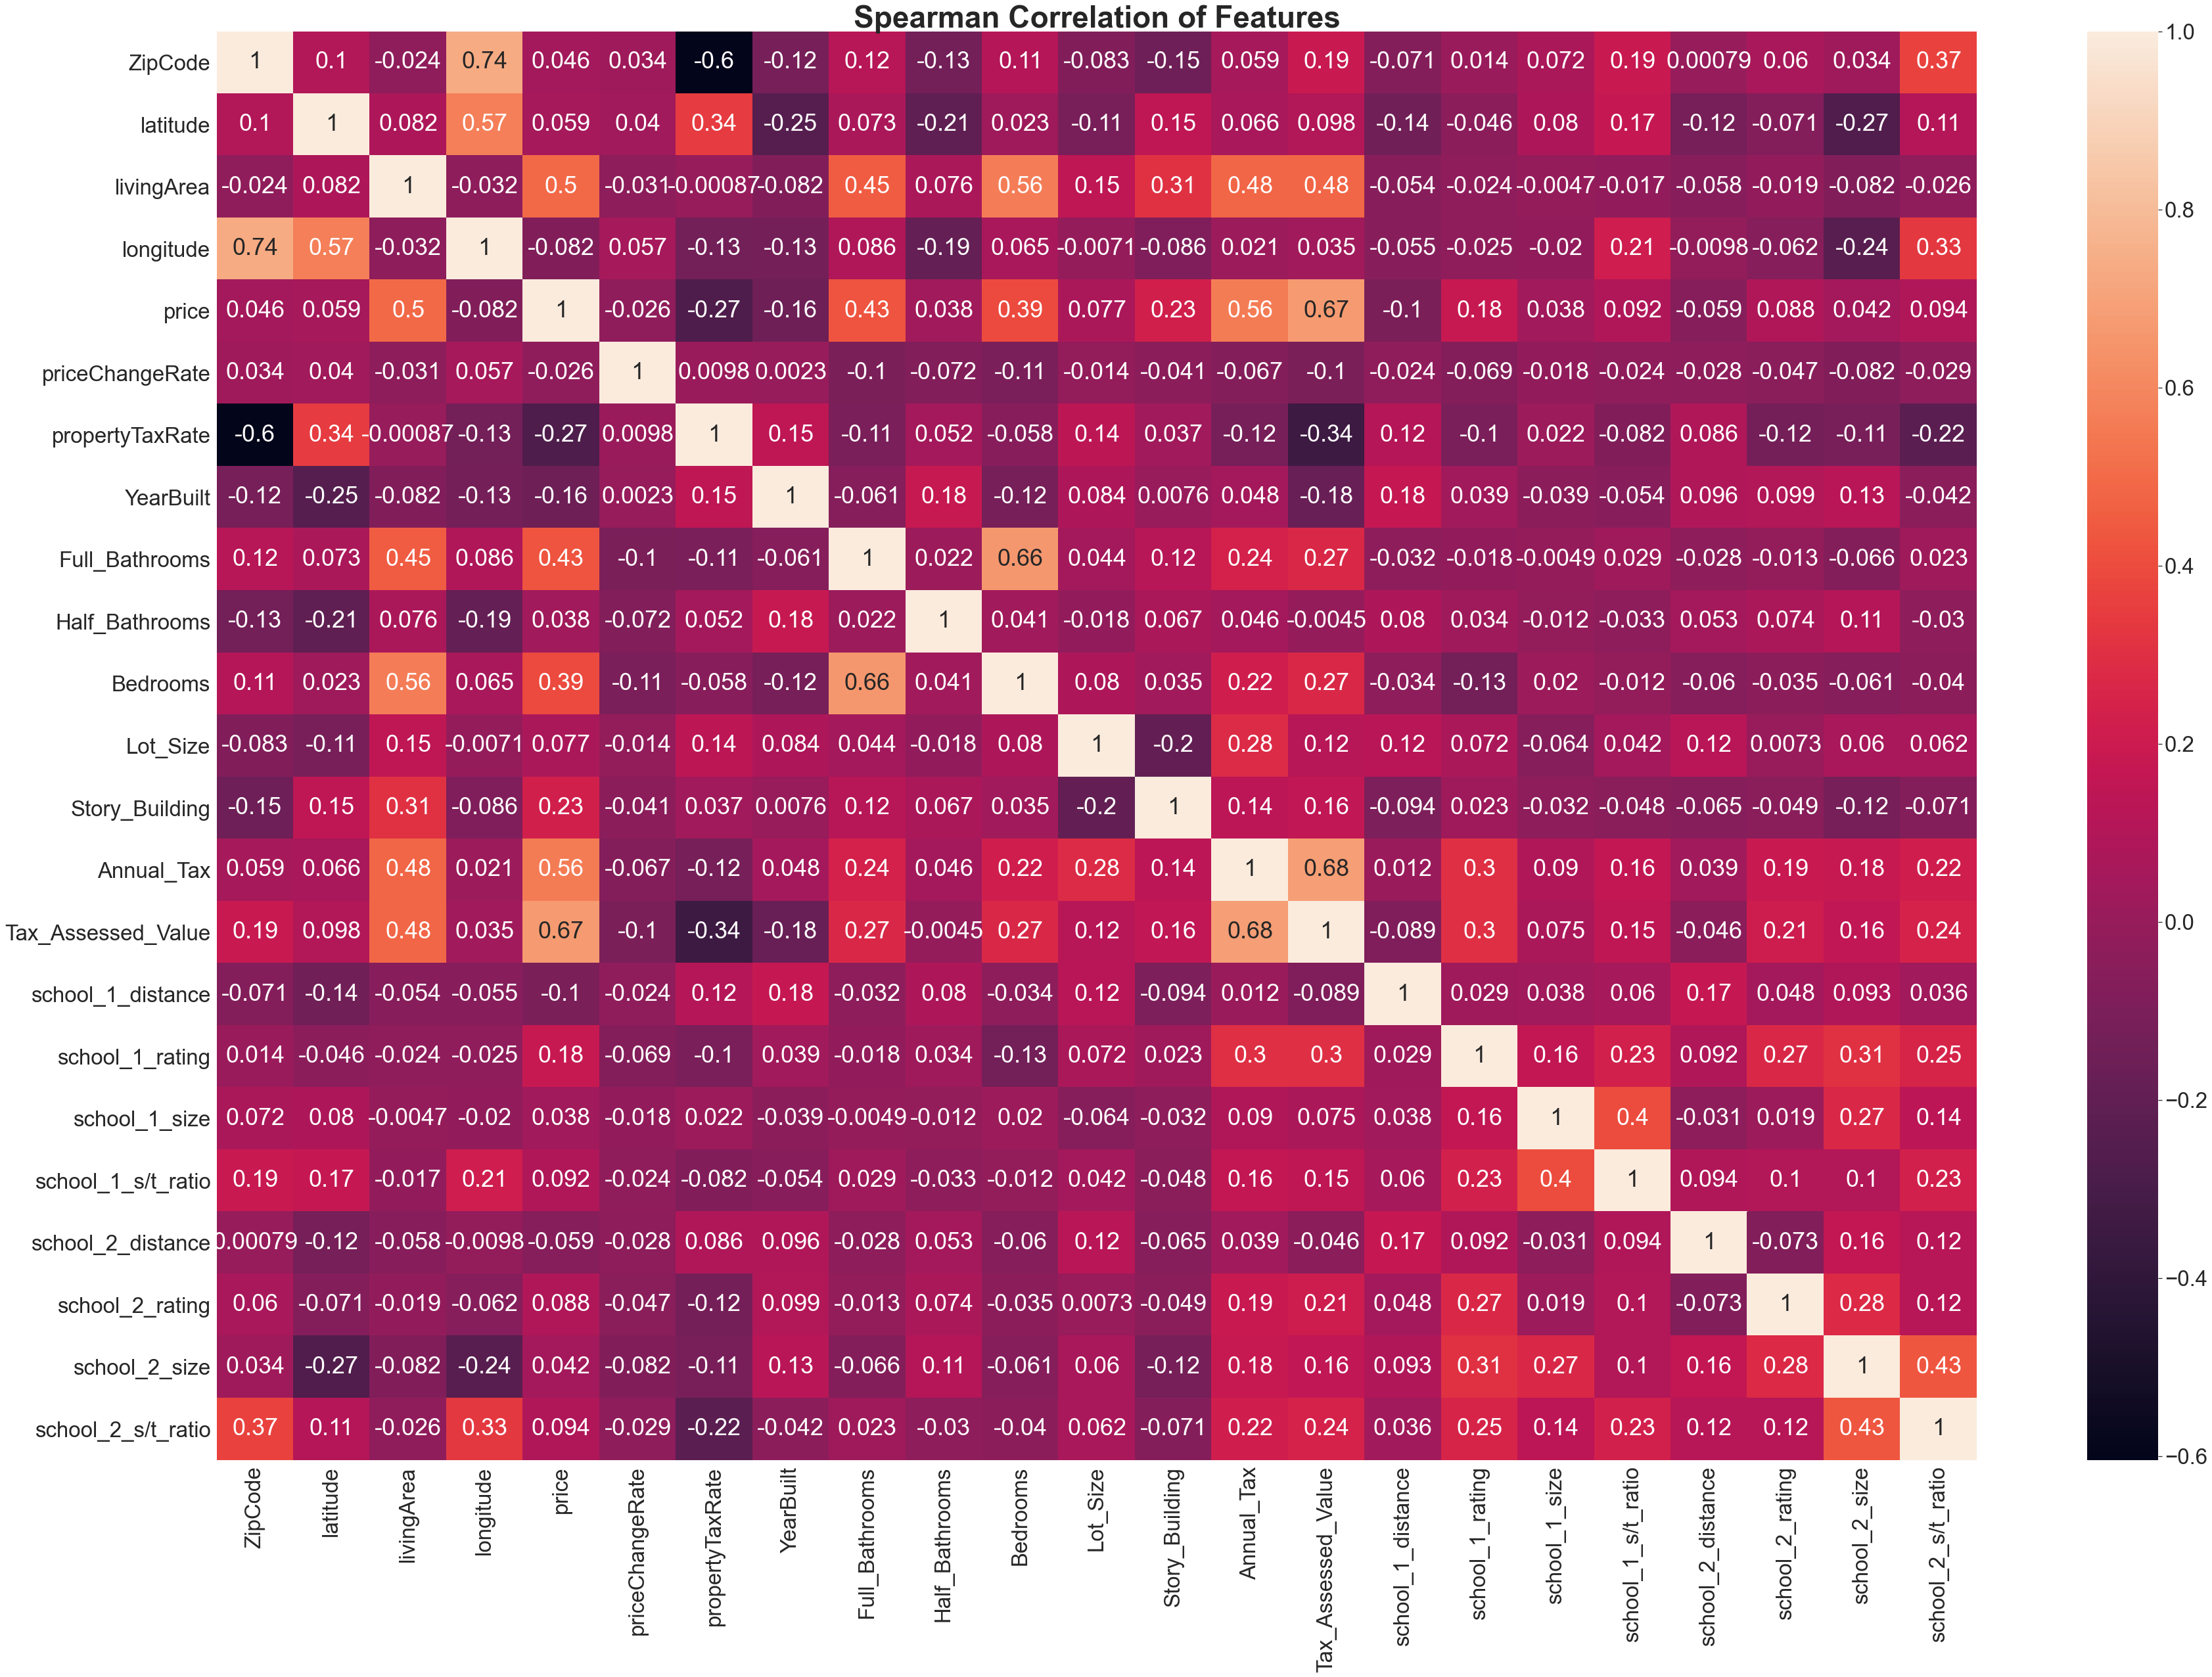

In [17]:
plt.figure(figsize=(60,40))
sns.set(font_scale=3)
heatmap = sns.heatmap(df.corr(method='spearman'), annot=True)
plt.title('Spearman Correlation of Features', fontweight='bold', fontsize=46)
plt.show()

#### It seems livingArea, Full_Bathrooms, Bedrooms, Annual_Tax, Tax_Assessed_Value seems have the most correlation with our target variable price

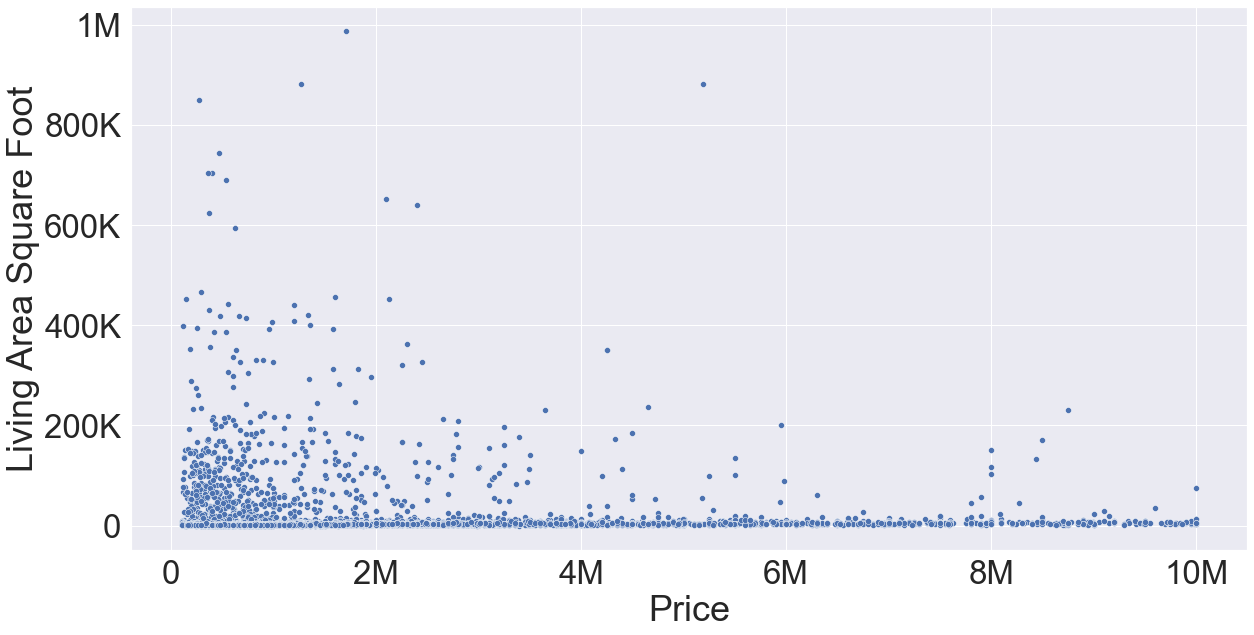

In [14]:
fig, ax = plt.subplots(figsize=(20,10))
sns.scatterplot(y ="livingArea", x ="price", data = df)
plt.ylabel('Living Area Square Foot')
plt.xlabel('Price')
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
plt.show()

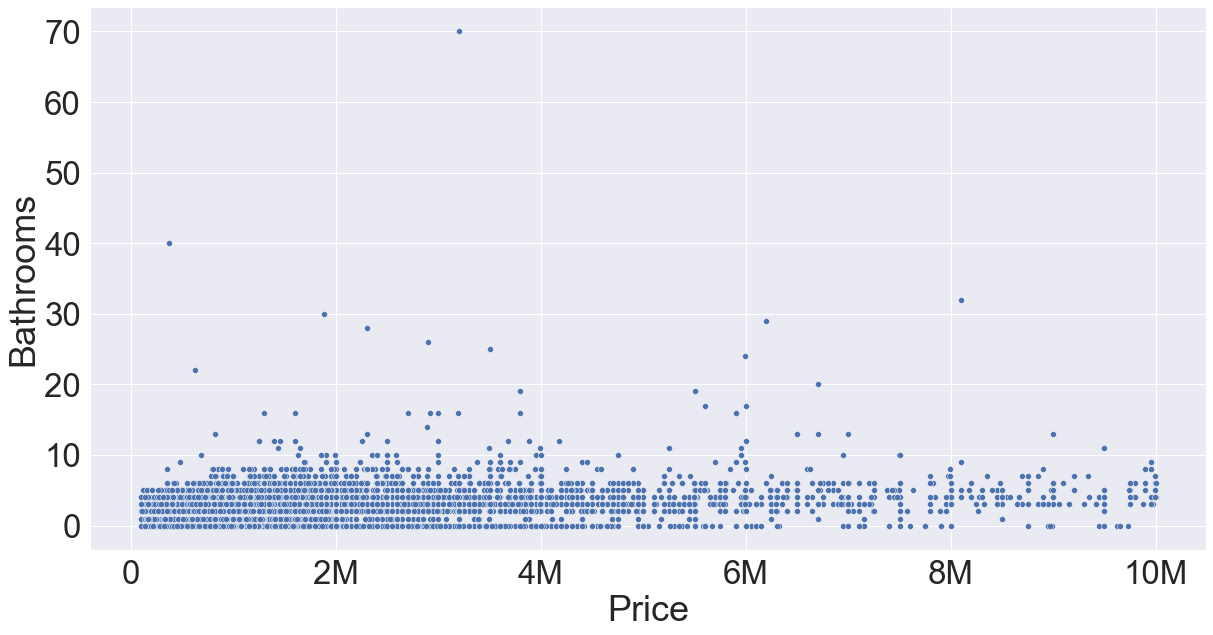

In [13]:
fig, ax = plt.subplots(figsize=(20,10))
sns.scatterplot(y ="Full_Bathrooms", x ="price", data = df)
plt.ylabel('Bathrooms')
plt.xlabel('Price')
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
plt.show()

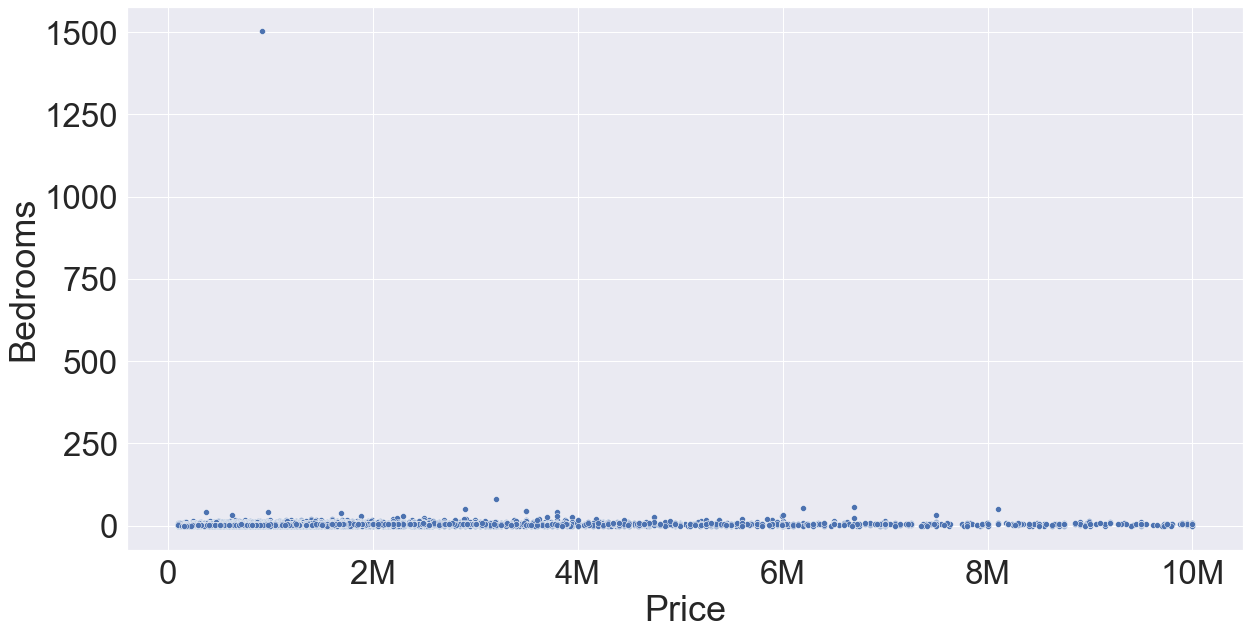

In [14]:
fig, ax = plt.subplots(figsize=(20,10))
sns.scatterplot(y ="Bedrooms", x ="price", data = df)
plt.ylabel('Bedrooms')
plt.xlabel('Price')

ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
plt.show()

There seems to be a outlier with over 1400 bedrooms and bathrooms lets check it out 

In [15]:
df[df.Bedrooms == 1502]
# This is most likely a wrong entry after doing some the google research

,City,address/streetAddress,ZipCode,latitude,livingArea,longitude,price,priceChangeRate,propertyTaxRate,HomeType,...,school_1_rating,school_1_size,school_1_s/t_ratio,school_1_type,school_2_distance,school_2_level,school_2_rating,school_2_size,school_2_s/t_ratio,school_2_type
40886,Brooklyn,347 54th St,11220.000,40.645,1600.000,-74.016,920000.000,-0.163,0.650,Residential,...,4.000,1081.000,11.000,Public,1.000,Middle,9.000,1539.000,13.000,Public


In [16]:
pd.set_option('display.max_columns', None)


In [17]:
df.Bedrooms.max()

1502.0

In [18]:
df.loc[df.Bedrooms == 1502, 'Tax_Assessed_Value'] = 47520
df.loc[df.Bedrooms == 1502, 'Bedrooms'] = 5

# I have manually imputed the right values for this specific house

In [19]:
df.loc[df.Bedrooms == 1502, 'Tax_Assessed_Value']


Series([], Name: Tax_Assessed_Value, dtype: float64)

In [20]:
df.loc[df.Full_Bathrooms == 70]
#This property is completely wrong on all accounts it was previously a land which is being reconstructed into a new 
#apartment complex which is not even finished so i will drop

,City,address/streetAddress,ZipCode,latitude,livingArea,longitude,price,priceChangeRate,propertyTaxRate,HomeType,YearBuilt,ParkingType,Full_Bathrooms,Half_Bathrooms,Bedrooms,Lot_Size,Story_Building,Annual_Tax,Tax_Assessed_Value,school_1_distance,school_1_grades,school_1_level,school_1_rating,school_1_size,school_1_s/t_ratio,school_1_type,school_2_distance,school_2_level,school_2_rating,school_2_size,school_2_s/t_ratio,school_2_type
6226,Bronx,1773 Weeks Ave,10457.000,40.846,49000.000,-73.908,3200000.000,0.143,0.950,Multiple Occupancy,1930.000,"Garage, Garage - Attached",70.000,50.000,80.000,3484.000,3.000,5852.000,1268000.000,0.100,K-5,Elementary,3.000,1231.000,15.000,Public,0.200,Middle,5.000,462.000,12.000,Public


In [21]:
df = df.drop(6218, axis=0).reset_index(drop=True)

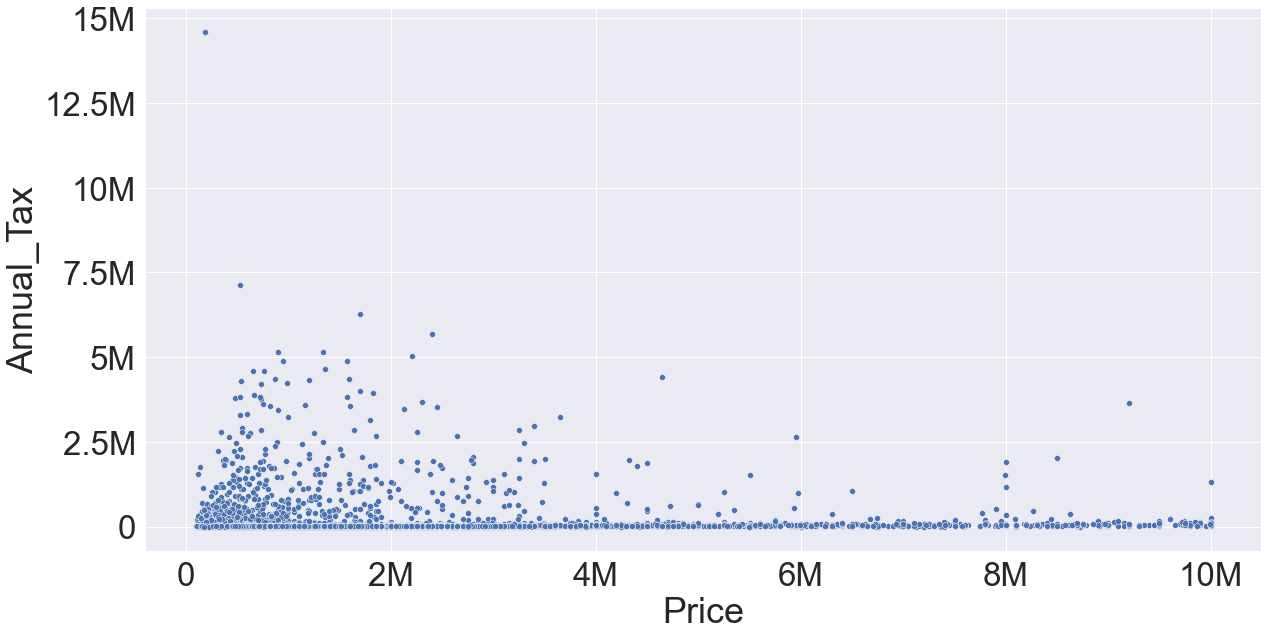

In [22]:
fig, ax = plt.subplots(figsize=(20,10))
sns.scatterplot(y ="Annual_Tax", x ="price", data = df)
plt.ylabel('Annual_Tax')
plt.xlabel('Price')
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
plt.show()

In [23]:
df[df.Annual_Tax == df.Annual_Tax.max()]
# It seems while the annual tax is correct the price is very wrong we shall also drop this 

,City,address/streetAddress,ZipCode,latitude,livingArea,longitude,price,priceChangeRate,propertyTaxRate,HomeType,YearBuilt,ParkingType,Full_Bathrooms,Half_Bathrooms,Bedrooms,Lot_Size,Story_Building,Annual_Tax,Tax_Assessed_Value,school_1_distance,school_1_grades,school_1_level,school_1_rating,school_1_size,school_1_s/t_ratio,school_1_type,school_2_distance,school_2_level,school_2_rating,school_2_size,school_2_s/t_ratio,school_2_type
10459,Floral Park,26910 Grand Central Pkwy APT 4U,11005.000,40.758,640.000,-73.718,190000.000,-0.205,0.840,Condo,1975.000,"Garage, Garage - Attached, Covered",1.000,0.000,0.000,4228369.200,nan,14584909.000,329441000.000,0.600,PK-5,Primary,8.000,384.000,6.000,Public,1.100,Middle,8.000,983.000,16.000,Public


In [ ]:
df = df.drop([10427,35762],  axis=0).reset_index(drop=True)

In [24]:
df[df.Annual_Tax > 6000000]


,City,address/streetAddress,ZipCode,latitude,livingArea,longitude,price,priceChangeRate,propertyTaxRate,HomeType,YearBuilt,ParkingType,Full_Bathrooms,Half_Bathrooms,Bedrooms,Lot_Size,Story_Building,Annual_Tax,Tax_Assessed_Value,school_1_distance,school_1_grades,school_1_level,school_1_rating,school_1_size,school_1_s/t_ratio,school_1_type,school_2_distance,school_2_level,school_2_rating,school_2_size,school_2_s/t_ratio,school_2_type
10459,Floral Park,26910 Grand Central Pkwy APT 4U,11005.000,40.758,640.000,-73.718,190000.000,-0.205,0.840,Condo,1975.000,"Garage, Garage - Attached, Covered",1.000,0.000,0.000,4228369.200,nan,14584909.000,329441000.000,0.600,PK-5,Primary,8.000,384.000,6.000,Public,1.100,Middle,8.000,983.000,16.000,Public
35814,New York,11 Riverside Dr,10023.000,40.781,689522.000,-73.984,530000.000,-0.338,0.880,Condo,1951.000,"Carport, Garage - Attached, Garage - Detached",2.000,0.000,2.000,76230.000,1.000,7123810.000,168184000.000,0.400,K-12,Elementary,9.000,313.000,14.000,Public,nan,NaN,nan,nan,nan,NaN
36379,New York,357-389 Grand St,10002.000,40.717,986641.000,-73.990,1700000.000,0.511,0.880,Condo,1953.000,0 spaces,nan,nan,1.000,293594.400,21.000,6274394.000,154526000.000,0.100,PK-5,Primary,9.000,655.000,13.000,Public,0.300,Middle,3.000,201.000,10.000,Public


Seems to be there are a lot of incorrect entries on annual_tax and tax_assessed we can remove the wrong entries but that would take to long rather i think we can transform this feature into a log to not allow the outliers to negatively impact our model in the future

In [41]:
df[df.YearBuilt > 2021]

,City,address/streetAddress,ZipCode,latitude,livingArea,longitude,price,priceChangeRate,propertyTaxRate,HomeType,YearBuilt,ParkingType,Full_Bathrooms,Half_Bathrooms,Bedrooms,Lot_Size,Story_Building,Annual_Tax,Tax_Assessed_Value,school_1_distance,school_1_grades,school_1_level,school_1_rating,school_1_size,school_1_s/t_ratio,school_1_type,school_2_distance,school_2_level,school_2_rating,school_2_size,school_2_s/t_ratio,school_2_type
52757,Bronx,4319 Boyd Ave,10466.000,40.896,1802.000,-73.852,545000.000,0.038,0.950,Residential Income,4073.000,None,2.000,0.000,3.000,2178.000,nan,4073.000,482000.000,0.400,K-5,Elementary,6.000,587.000,16.000,Public,1.000,Middle,4.000,301.000,10.000,Public
57319,Bronx,2011 Gildersleeve Ave,10473.000,40.810,2200.000,-73.851,335000.000,0.000,0.950,Residential,2200.000,On Street,2.000,0.000,3.000,2178.000,nan,4091.000,413000.000,0.600,PK-5,Primary,4.000,875.000,16.000,Public,0.500,Middle,4.000,690.000,12.000,Public
58009,Flushing,2743 Butler St,11369.000,40.764,nan,-73.864,1208000.000,-0.137,0.840,Residential Income,2060.000,"Private, Detached",5.000,0.000,6.000,0.090,nan,6780.000,942000.000,0.600,K-4,Elementary,3.000,383.000,nan,Public,1.600,Middle,8.000,1696.000,14.000,Public


In [42]:
df.loc[df.YearBuilt == 2200, 'YearBuilt'] = 1930
df.loc[df.YearBuilt == 2060, 'YearBuilt'] = 2009
df.loc[df.YearBuilt == 4073, 'YearBuilt'] = 1901

#Fixing the wrong entries

In [54]:
df.loc[df.YearBuilt < 1280, 'YearBuilt'] = df.YearBuilt.median()

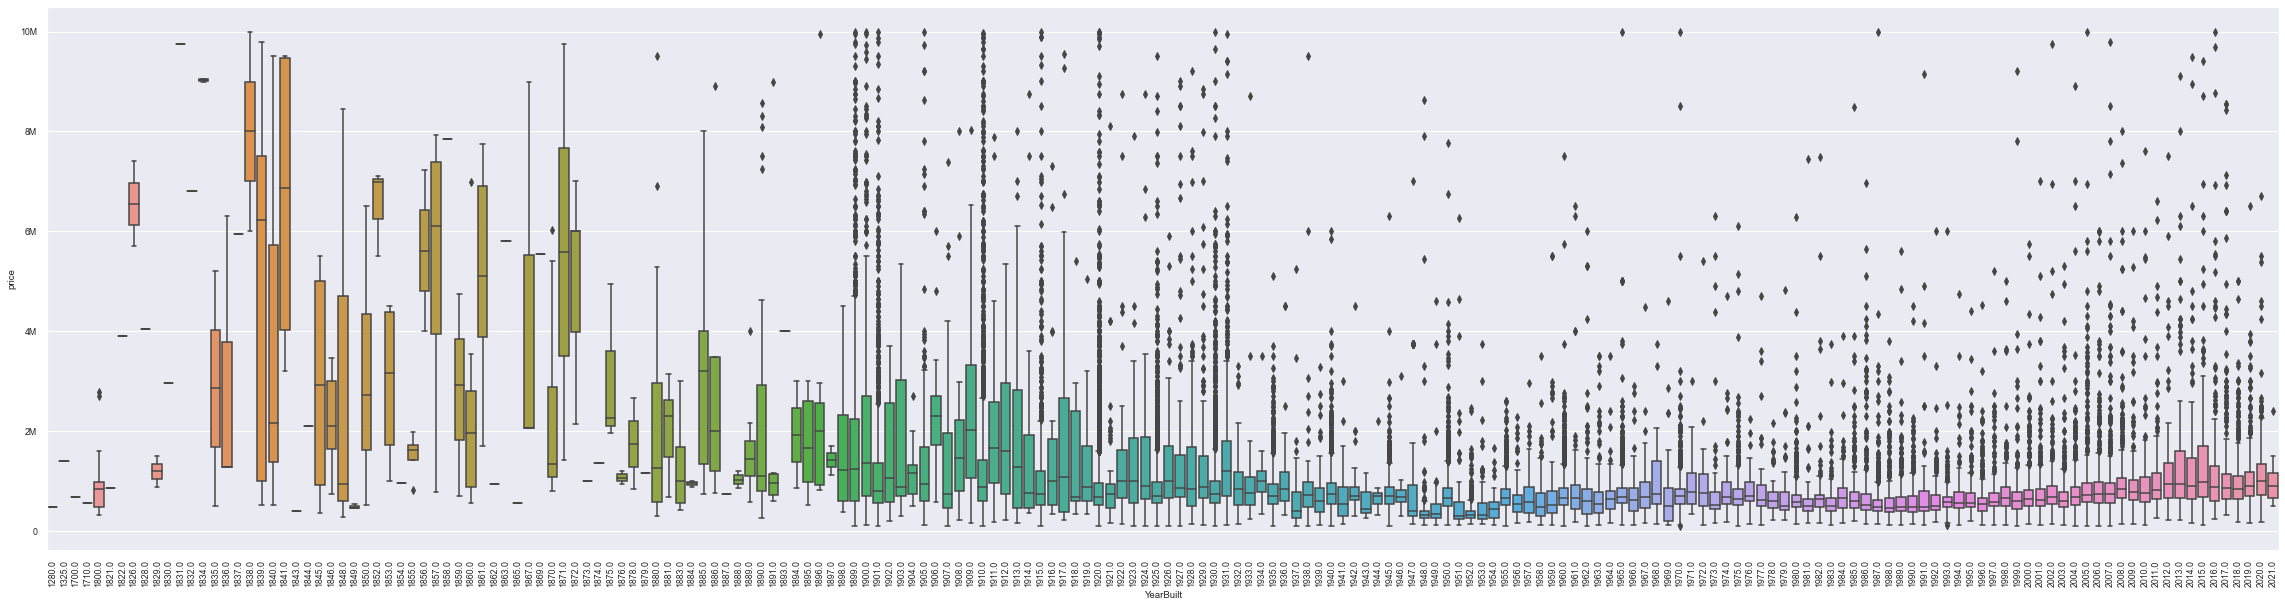

In [57]:
fig, ax = plt.subplots(figsize=(40,10))
sns.boxplot(x=df.YearBuilt, y=df.price, data=df)
plt.xticks(rotation=90)
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))

plt.show()

In [75]:
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by=['count', '%'])


,count,%
City,0,0.000
address/streetAddress,0,0.000
price,0,0.000
latitude,1,0.002
longitude,1,0.002
ZipCode,7,0.011
propertyTaxRate,13,0.021
school_1_distance,85,0.136
school_1_level,85,0.136
school_1_type,85,0.136


A map of all the houses in our dataset utilizing their latitudes and longitudes 

<Figure size 864x864 with 0 Axes>

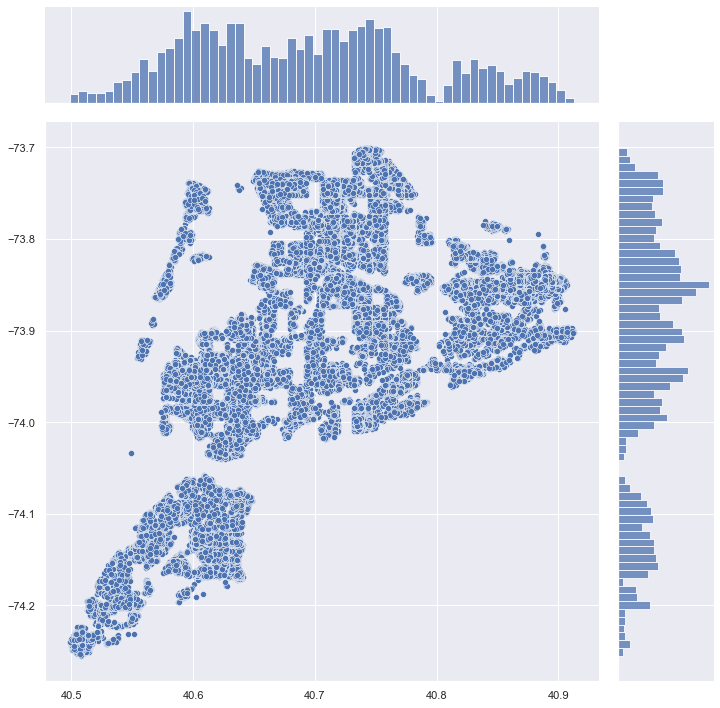

In [77]:
plt.figure(figsize=(12,12))
sns.jointplot(x=df.latitude.values, y=df.longitude.values, height=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

In [78]:
df.to_csv(r'C:\Users\izine\Desktop\GitHub\Springboard-Data-Science\Capstone 2\Redo\ny_eda_data.csv', index=False)